In [11]:
load("~/ma611-code/solid_angle.sage")

In [12]:
load("~/ma611-code/decomp.sage")

In [28]:
A = matrix([[1,-1,0],[2,1,1],[-1,0,0]])
C = list(generate_cones_decomposition(A)) 

In [14]:
solid_angle_measure(C[0][0])

INFO: Associated Matrix:
[                1.0 -0.2886751345948128                 0.0]
[-0.2886751345948128                 1.0 -0.9428090415820634]
[                0.0 -0.9428090415820634                 1.0]


0.012266062796929114

In [15]:
solid_angle_measure(C[1][0])

INFO: Associated Matrix:
[                1.0 -0.7071067811865475                 0.0]
[-0.7071067811865475                 1.0 -0.5773502691896257]
[                0.0 -0.5773502691896257                 1.0]


0.34684523389214433

In [16]:
def plot_error_3d_wrt_eps(A, deg=100, color="red"):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    eps_list=[1e-1, 5.5e-2, 1e-2, 5.5e-3, 1e-3, 5.5e-4, 1e-4, 5.5e-5, 10e-5, 5.5e-6, 1e-6, 5.5e-7, 1e-7, 5.5e-8, 1e-8, 5.5e-9, 1e-9]
    for i in eps_list:
        sam_ij=solid_angle_measure(A, deg=deg, eps=i)
        error_ij=abs(sam_ij-actual_measure)
        list_ij=(i, error_ij)
        print(list_ij)
        list.append(list_ij)
    return list_plot_semilogx(list, axes_labels=['$eps$', '$error$'], color=color) 

In [17]:
def plot_error_3d_wrt_deg(A, s, t, eps=1e-2, color="red"):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    for i in range(s,t+1):
        sam_ij=solid_angle_measure(A, deg=10*i, eps=eps)
        error_ij=abs(sam_ij-actual_measure)
        list_ij=(10*i, error_ij)
        print(list_ij)
        list.append(list_ij)
    return list_plot(list, axes_labels=['$deg$', '$error$'], color=color) 

In [94]:
def plot_error_3d_wrt_criticaldeg_and_criticaleps(A, T, color="red"):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    for (i,j) in T:
        sam_ij=solid_angle_measure(A, deg=j, eps=i)
        error_ij=abs(sam_ij-actual_measure)
        list_ij=(i, error_ij)
        print(j, list_ij)
        list.append(list_ij)
    return list_plot(list, scale='loglog', axes_labels=['$eps$', '$error-wrt-critical-deg$'], color=color) 

In [81]:
def plot_error_ratio(A, T):
    logging.disable(logging.INFO)
    logging.disable(logging.WARNING)
    actual_measure=solid_angle_3d(A)
    print("Solid angle measure is: %s" % actual_measure)
    list=[]
    for (i,j) in T:
        sam_ij=solid_angle_measure(A, deg=j, eps=i)
        error_ratio_ij=abs(sam_ij-actual_measure)/i
        list_ij=(i, error_ratio_ij)
        list.append(list_ij)
    return list

In [31]:
A = matrix([[1,-1,0],[2,1,1],[-1,0,0]])
C = list(generate_cones_decomposition(A)) 

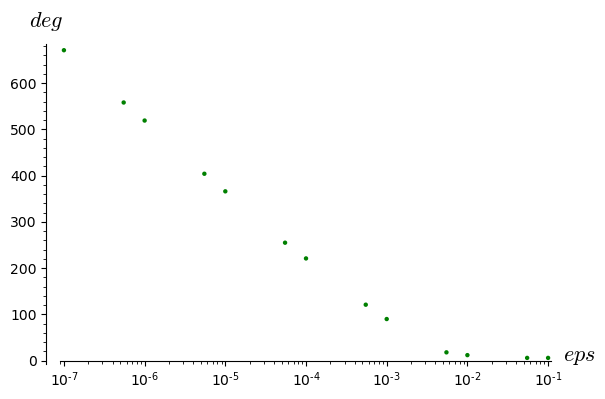

In [96]:
#C[0][0] log scale
T=[(1e-1,6), (5.5e-2, 6), (1e-2,12), (5.5e-3,18), (1e-3,90), (5.5e-4, 121), (1e-4,221), (5.5e-5,255), (1e-5,366), (5.5e-6, 404), (1e-6,519), (5.5e-7, 558),(1e-7,671)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green") 

Interpretation: Above we see the plot of eps (plotted on a log scale) with its corresponding critical degree. 

Solid angle measure is: 0.011865046884419285
(1/10, 0.008968286448914162)
(0.0550000000000000, 0.008968286448914162)
(1/100, 0.0044951818710202915)
(0.00550000000000000, 0.0044951818710202915)
(1/1000, 0.0044951818710202915)
(0.000500000000000000, 0.0044951818710202915)
(1/10000, 0.0044951818710202915)
(0.0000550000000000000, 0.0044951818710202915)
(1/100000, 0.0044951818710202915)
(5.50000000000000e-6, 0.0044951818710202915)
(1/1000000, 0.0044951818710202915)
(5.50000000000000e-7, 0.0044951818710202915)
(1/10000000, 0.0044951818710202915)
(5.50000000000000e-8, 0.0044951818710202915)
(1/100000000, 0.0044951818710202915)
(5.50000000000000e-9, 0.0044951818710202915)
(1/1000000000, 0.0044951818710202915)
Solid angle measure is: 0.011865046884419285
(1/10, 0.008968286448914162)
(0.0550000000000000, 0.008968286448914162)
(1/100, 0.0044951818710202915)
(0.00550000000000000, 0.003321638091949011)
(1/1000, 0.003321638091949011)
(0.000500000000000000, 0.003321638091949011)
(1/10000, 0.003321638

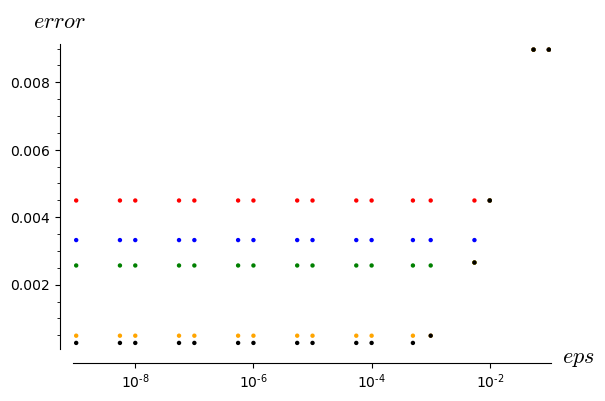

In [20]:
G=plot_error_3d_wrt_eps(C[0][0], deg=6)
H=plot_error_3d_wrt_eps(C[0][0], deg=12, color="blue")
K=plot_error_3d_wrt_eps(C[0][0], deg=19, color="green")
L=plot_error_3d_wrt_eps(C[0][0], deg=90, color="orange")
M=plot_error_3d_wrt_eps(C[0][0], deg=366, color="black")
G+H+K+L+M

Interpretation: The plot above shows us that for various degree values, when the critical degree for an epsilon has been met, the error becomes constant. This aligns with the observation that for each degree, there is a corresponding critical epsilon which truncates the series.

Solid angle measure is: 0.011865046884419285
(0, 0.008968286448914162)
(10, 0.008968286448914162)
(20, 0.008968286448914162)
(30, 0.008968286448914162)
(40, 0.008968286448914162)
(50, 0.008968286448914162)
(60, 0.008968286448914162)
(70, 0.008968286448914162)
(80, 0.008968286448914162)
(90, 0.008968286448914162)
(100, 0.008968286448914162)
(110, 0.008968286448914162)
(120, 0.008968286448914162)
(130, 0.008968286448914162)
(140, 0.008968286448914162)
(150, 0.008968286448914162)
(160, 0.008968286448914162)
(170, 0.008968286448914162)
(180, 0.008968286448914162)
(190, 0.008968286448914162)
(200, 0.008968286448914162)
(210, 0.008968286448914162)
(220, 0.008968286448914162)
(230, 0.008968286448914162)
(240, 0.008968286448914162)
(250, 0.008968286448914162)
(260, 0.008968286448914162)
(270, 0.008968286448914162)
(280, 0.008968286448914162)
(290, 0.008968286448914162)
(300, 0.008968286448914162)
(310, 0.008968286448914162)
(320, 0.008968286448914162)
(330, 0.008968286448914162)
(340, 0.008968

(660, 4.9265049200492364e-05)
(670, 4.9265049200492364e-05)
(680, 4.9265049200492364e-05)
(690, 4.9265049200492364e-05)
(700, 4.9265049200492364e-05)
Solid angle measure is: 0.011865046884419285
(0, 0.008968286448914162)
(10, 0.0036261392744574537)
(20, 0.0024856728722402587)
(30, 0.001849693589124313)
(40, 0.0014267030934466737)
(50, 0.0011241560384067824)
(60, 0.000898822211456601)
(70, 0.0007264969888763125)
(80, 0.0005921820148746537)
(90, 0.0004859691733563685)
(100, 0.0004010159125098292)
(110, 0.00033243804456630985)
(120, 0.0002766579708263217)
(130, 0.00023099975678374587)
(140, 0.00019342693666487762)
(150, 0.00016236700719523753)
(160, 0.000136590663269048)
(170, 0.00011512672285741814)
(180, 9.720095679876216e-05)
(190, 8.21913099229455e-05)
(200, 6.959459665741886e-05)
(210, 5.900137921224964e-05)
(220, 5.0076778927194907e-05)
(230, 4.254565505173134e-05)
(240, 3.618104257849773e-05)
(250, 3.0795052272864984e-05)
(260, 2.623165179848827e-05)
(270, 2.236089859552516e-05)
(2

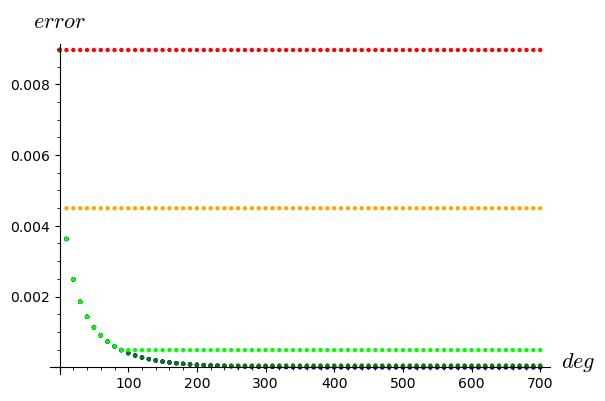

In [37]:
G1=plot_error_3d_wrt_deg(C[0][0], s=0, t=70, eps=1e-1)
G2=plot_error_3d_wrt_deg(C[0][0], 0, 70, eps=1e-2, color="orange") 
G3=plot_error_3d_wrt_deg(C[0][0],0, 70, eps=1e-3, color="lime")
G4=plot_error_3d_wrt_deg(C[0][0], 0, 70, eps=1e-4, color="green")
G5=plot_error_3d_wrt_deg(C[0][0], 0, 70, eps=1e-5, color="blue")
G6=plot_error_3d_wrt_deg(C[0][0], 0, 70, eps=1e-6, color="purple")
G7=plot_error_3d_wrt_deg(C[0][0], 0, 70, eps=1e-7, color="black")
#G1+G2+G3+G4+G5+G6+G7+G8
G7+G6+G5+G4+G3+G2+G1

Interpretation: Each color represents the error curve for a specific epsilon. For each epsilon, we see that when the critical degree is met, the error becomes constant. For instance, we see that the lime green curve correponds to eps=1e-3. Note that the critical degree for this eps is 90. We see that the curve becomes constant at this degree.

Solid angle measure is: 0.011865046884419285
(80, 0.0005921820148746537)
(90, 0.0004859691733563685)
(100, 0.0004859691733563685)
(110, 0.0004859691733563685)
(120, 0.0004859691733563685)
(130, 0.0004859691733563685)
(140, 0.0004859691733563685)
(150, 0.0004859691733563685)
(160, 0.0004859691733563685)
(170, 0.0004859691733563685)
(180, 0.0004859691733563685)
(190, 0.0004859691733563685)
(200, 0.0004859691733563685)
(210, 0.0004859691733563685)
(220, 0.0004859691733563685)
(230, 0.0004859691733563685)
(240, 0.0004859691733563685)
(250, 0.0004859691733563685)
(260, 0.0004859691733563685)
(270, 0.0004859691733563685)
Solid angle measure is: 0.011865046884419285
(80, 0.0005921820148746537)
(90, 0.0004859691733563685)
(100, 0.0004010159125098292)
(110, 0.00033243804456630985)
(120, 0.0002766579708263217)
(130, 0.00027167459203392315)
(140, 0.00027167459203392315)
(150, 0.00027167459203392315)
(160, 0.00027167459203392315)
(170, 0.00027167459203392315)
(180, 0.00027167459203392315)
(190, 0.

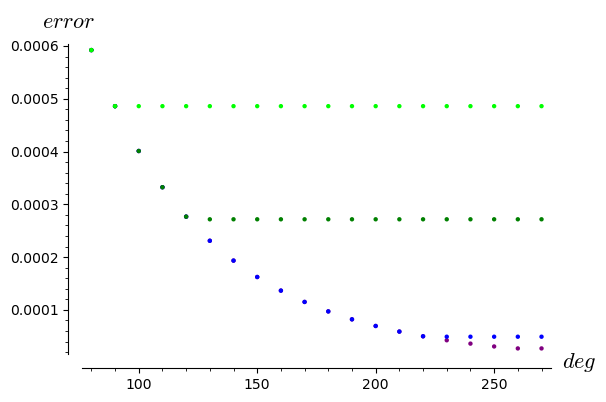

In [44]:
G3=plot_error_3d_wrt_deg(C[0][0], 8, 27, eps=1e-3, color="lime")
G4=plot_error_3d_wrt_deg(C[0][0], 8, 27, eps=5.5e-4, color="green")
G5=plot_error_3d_wrt_deg(C[0][0], 8, 27, eps=1e-4, color="blue")
G6=plot_error_3d_wrt_deg(C[0][0], 8, 27, eps=5.5e-5, color="purple")
G6+G5+G4+G3

Interpretation: Above, we restrict the epsilons to the range 5.5e-5 to 1e-3 to demonstrate that the error does indeed become constant at the corresponding critical degree.

Solid angle measure is: 0.011865046884419285
6 (0.0550000000000000, 0.008968286448914162)
12 (0.0100000000000000, 0.0044951818710202915)
18 (0.00550000000000000, 0.0026556990502708475)
90 (0.00100000000000000, 0.0004859691733563685)
121 (0.000550000000000000, 0.00027167459203392315)
221 (0.000100000000000000, 4.9265049200492364e-05)
255 (0.0000550000000000000, 2.8419202005027303e-05)
366 (0.0000100000000000000, 4.970365130124027e-06)
404 (5.50000000000000e-6, 2.7703805514749102e-06)
519 (1.00000000000000e-6, 4.91269524109661e-07)
558 (5.50000000000000e-7, 2.694688757149538e-07)
671 (1.00000000000000e-7, 5.003609248634133e-08)


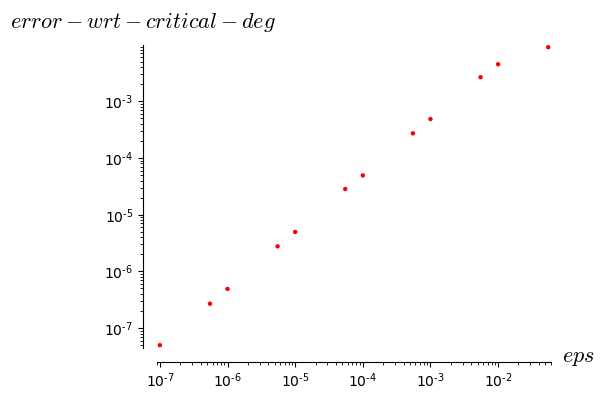

In [38]:
T=[(5.5e-2, 6), (1e-2,12), (5.5e-3,18), (1e-3,90), (5.5e-4, 121), (1e-4,221), (5.5e-5,255), (1e-5,366), (5.5e-6, 404), (1e-6,519), (5.5e-7, 558),(1e-7,671)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(C[0][0], T, color="red")

Interpretation: Above we see the error with respect to eps, when taken at the critical degree. The plot suggests that error is dependent on epsilon, and decreases as eps decreases.

In [85]:
T=[(5.5e-2, 6), (1e-2,12), (5.5e-3,18), (1e-3,90), (5.5e-4, 121), (1e-4,221), (5.5e-5,255), (1e-5,366), (5.5e-6, 404), (1e-6,519), (5.5e-7, 558),(1e-7,671)]
plot_error_ratio(C[0][0], T)

Solid angle measure is: 0.011865046884419285


[(0.0550000000000000, 0.16305975361662112),
 (0.0100000000000000, 0.4495181871020291),
 (0.00550000000000000, 0.48285437277651777),
 (0.00100000000000000, 0.48596917335636847),
 (0.000550000000000000, 0.49395380369804204),
 (0.000100000000000000, 0.4926504920049236),
 (0.0000550000000000000, 0.5167127637277691),
 (0.0000100000000000000, 0.49703651301240265),
 (5.50000000000000e-6, 0.50370555481362),
 (1.00000000000000e-6, 0.49126952410966096),
 (5.50000000000000e-7, 0.4899434103908251),
 (1.00000000000000e-7, 0.5003609248634133)]

Interpretation: Above we see that the ratio of the error at eps (with critical degree) to eps is approx 0.49. This suggests that for this cone, we have that the error can be approximated by a linear relation: 0.49 * eps.

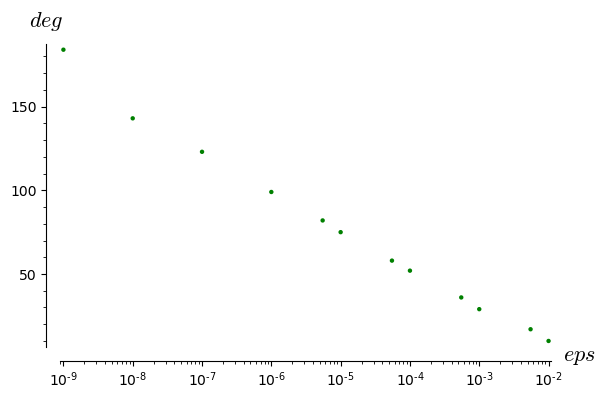

In [97]:
#C[1][0] log log scale
T=[(10^-2,10), (0.0055,17), (10^-3,29), (0.00055, 36), (10^-4,52), (5.5e-5,58), (10^-5,75), (5.5e-6, 82), (10^-6,99),(10^-7,123), (10^-8, 143), (10^-9, 184)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green")

Solid angle measure is: 0.34685501432950744
(1/10, 0.29582397802152455)
(0.0550000000000000, 0.29582397802152455)
(1/100, 0.07813628937619288)
(0.00550000000000000, 0.07813628937619288)
(1/1000, 0.07813628937619288)
(0.000500000000000000, 0.07813628937619288)
(1/10000, 0.07813628937619288)
(0.0000550000000000000, 0.07813628937619288)
(1/100000, 0.07813628937619288)
(5.50000000000000e-6, 0.07813628937619288)
(1/1000000, 0.07813628937619288)
(5.50000000000000e-7, 0.07813628937619288)
(1/10000000, 0.07813628937619288)
(5.50000000000000e-8, 0.07813628937619288)
(1/100000000, 0.07813628937619288)
(5.50000000000000e-9, 0.07813628937619288)
(1/1000000000, 0.07813628937619288)
Solid angle measure is: 0.34685501432950744
(1/10, 0.29582397802152455)
(0.0550000000000000, 0.29582397802152455)
(1/100, 0.07813628937619288)
(0.00550000000000000, 0.043794253151027085)
(1/1000, 0.03501554196488921)
(0.000500000000000000, 0.03501554196488921)
(1/10000, 0.03501554196488921)
(0.0000550000000000000, 0.0350

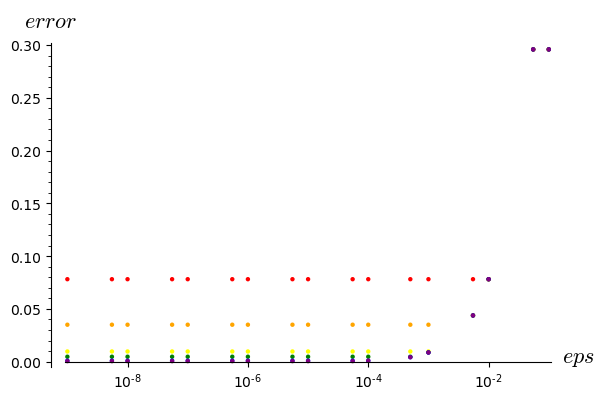

In [39]:
G=plot_error_3d_wrt_eps(C[1][0], deg=10, color="red")
H=plot_error_3d_wrt_eps(C[1][0], deg=17, color="orange")
K=plot_error_3d_wrt_eps(C[1][0], deg=29, color="yellow")
L=plot_error_3d_wrt_eps(C[1][0], deg=36, color="green")
M=plot_error_3d_wrt_eps(C[1][0], deg=52, color="blue")
N=plot_error_3d_wrt_eps(C[1][0], deg=58, color="purple")
G+H+K+L+M+N

Above, we show error with respect to epsilon. Each color corresponds to a critical degree and we see that the curve for that degree becomes constant at the corresponding critical epsilon, as expected.

Solid angle measure is: 0.34685501432950744
(0, 0.29582397802152455)
(10, 0.07813628937619288)
(20, 0.025188744069418956)
(30, 0.00871942793179964)
(40, 0.00312847684604195)
(50, 0.0011470642437214074)
(60, 0.0004267535724169491)
(70, 0.00016044863745473537)
(80, 6.080695189825125e-05)
(90, 2.3189007994306454e-05)
(100, 8.887838304494355e-06)
(110, 3.420655060315525e-06)
(120, 1.3210832945920181e-06)
(130, 9.936545097288807e-07)
(140, 9.936545097288807e-07)
Solid angle measure is: 0.34685501432950744
(0, 0.29582397802152455)
(10, 0.07813628937619288)
(20, 0.025188744069418956)
(30, 0.00871942793179964)
(40, 0.00312847684604195)
(50, 0.0011470642437214074)
(60, 0.0004267535724169491)
(70, 0.00016044863745473537)
(80, 6.080695189825125e-05)
(90, 2.3189007994306454e-05)
(100, 9.780437363104966e-06)
(110, 9.780437363104966e-06)
(120, 9.780437363104966e-06)
(130, 9.780437363104966e-06)
(140, 9.780437363104966e-06)
Solid angle measure is: 0.34685501432950744
(0, 0.29582397802152455)
(10, 0.0

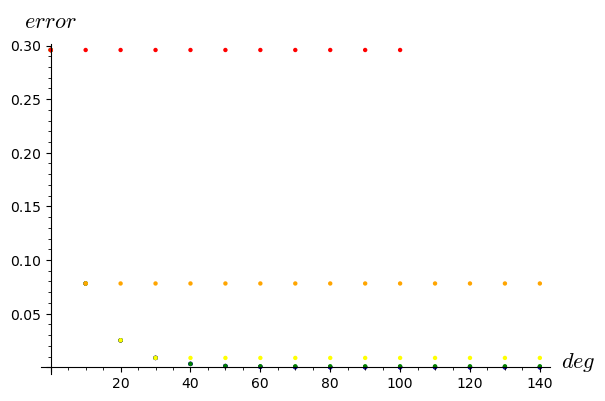

In [41]:
G1=plot_error_3d_wrt_deg(C[1][0], 0, 14, eps=1e-7, color="black")
G2=plot_error_3d_wrt_deg(C[1][0], 0, 14, eps=1e-6, color="purple")
G3=plot_error_3d_wrt_deg(C[1][0], 0, 14, eps=1e-5, color="blue")
G4=plot_error_3d_wrt_deg(C[1][0], 0, 14, eps=1e-4, color="green")
G5=plot_error_3d_wrt_deg(C[1][0],0, 14, eps=1e-3, color="yellow")
G6=plot_error_3d_wrt_deg(C[1][0], 0, 14, eps=1e-2, color="orange") 
G7=plot_error_3d_wrt_deg(C[1][0], s=0, t=10, eps=1e-1)
G1+G2+G3+G4+G5+G6+G7

Solid angle measure is: 0.34685501432950744
(20, 0.025188744069418956)
(30, 0.00871942793179964)
(40, 0.00312847684604195)
(50, 0.0011470642437214074)
(60, 0.0004267535724169491)
(70, 0.00016044863745473537)
(80, 6.080695189825125e-05)
(90, 2.3189007994306454e-05)
(100, 9.780437363104966e-06)
(110, 9.780437363104966e-06)
(120, 9.780437363104966e-06)
Solid angle measure is: 0.34685501432950744
(20, 0.025188744069418956)
(30, 0.00871942793179964)
(40, 0.00312847684604195)
(50, 0.0011470642437214074)
(60, 0.0004267535724169491)
(70, 0.00016044863745473537)
(80, 8.956641719082281e-05)
(90, 8.956641719082281e-05)
(100, 8.956641719082281e-05)
(110, 8.956641719082281e-05)
(120, 8.956641719082281e-05)
Solid angle measure is: 0.34685501432950744
(20, 0.025188744069418956)
(30, 0.00871942793179964)
(40, 0.00312847684604195)
(50, 0.0011470642437214074)
(60, 0.0009403041523317612)
(70, 0.0009403041523317612)
(80, 0.0009403041523317612)
(90, 0.0009403041523317612)
(100, 0.0009403041523317612)
(110,

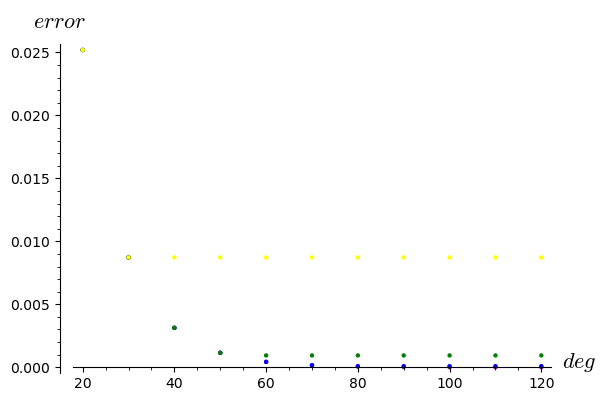

In [42]:
G2=plot_error_3d_wrt_deg(C[1][0], 2, 12, eps=1e-6, color="purple") #critical degree 99
G3=plot_error_3d_wrt_deg(C[1][0], 2, 12, eps=1e-5, color="blue")  #critical degree 75
G4=plot_error_3d_wrt_deg(C[1][0], 2, 12, eps=1e-4, color="green")  #critical degree 52
G5=plot_error_3d_wrt_deg(C[1][0], 2, 12, eps=1e-3, color="yellow")  #critical degree 29
G2+G3+G4+G5

Above, we again see that for each epsilon, when the critical degree has been met, the error becomes constant.

Solid angle measure is: 0.34685501432950744
10 (0.0100000000000000, 0.07813628937619288)
17 (0.00550000000000000, 0.043794253151027085)
29 (0.00100000000000000, 0.00967637869650545)
36 (0.000550000000000000, 0.004699177985445058)
52 (0.000100000000000000, 0.0009403041523317612)
58 (0.0000550000000000000, 0.0005195762094861722)
75 (0.0000100000000000000, 9.868824226899608e-05)
82 (5.50000000000000e-6, 5.0121201068842325e-05)
99 (1.00000000000000e-6, 9.780437363104966e-06)
106 (5.50000000000000e-7, 5.0094321594196245e-06)
123 (1.00000000000000e-7, 9.936545097288807e-07)


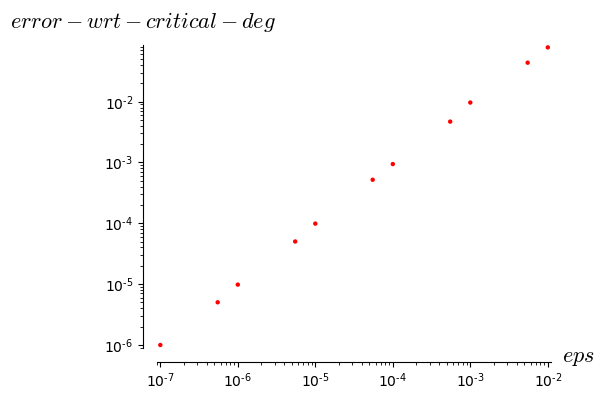

In [102]:
T=[(1e-2,10), (5.5e-3,17), (1e-3,29), (5.5e-4, 36), (1e-4,52), (5.5e-5,58), (1e-5,75), (5.5e-6, 82), (1e-6,99), (5.5e-7, 106),(1e-7, 123)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(C[1][0], T, color="red")

Above, we see that error is dependent on epsilon.

In [86]:
T=[(1e-2,10), (5.5e-3,17), (1e-3,29), (5.5e-4, 36), (1e-4,52), (5.5e-5,58), (1e-5,75), (5.5e-6, 82), (1e-6,99), (5.5e-7, 106)]
plot_error_ratio(C[1][0], T)

Solid angle measure is: 0.34685501432950744


[(0.0100000000000000, 7.813628937619288),
 (0.00550000000000000, 7.962591482004925),
 (0.00100000000000000, 9.67637869650545),
 (0.000550000000000000, 8.543959973536468),
 (0.000100000000000000, 9.403041523317611),
 (0.0000550000000000000, 9.446840172475857),
 (0.0000100000000000000, 9.868824226899608),
 (5.50000000000000e-6, 9.112945648880423),
 (1.00000000000000e-6, 9.780437363104966),
 (5.50000000000000e-7, 9.108058471672043)]

Interpretation: Above, we see that the ratio of the error to eps is approximately 9. Again, we see that this suggests that the error is a constant multiple of eps. However, note that the constants seem to vary depending on the cone.

In [50]:
Z_1=matrix([[-1,-1,-1],[2,2,1],[2,1,1]])
Z=list(generate_cones_decomposition(Z_1))

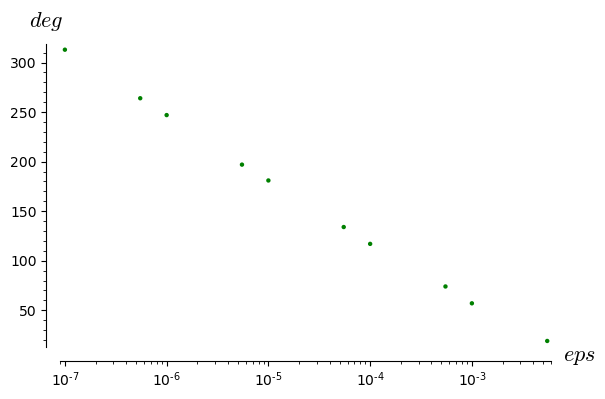

In [98]:
#Z[1][0] log scale
T=[(5.5e-3,19), (10^-3,57), (0.00055, 74), (10^-4,117), (5.5e-5,134), (10^-5,181), (5.5e-6, 197), (10^-6,247), (5.5e-7, 264), (10^-7, 313)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green")

Solid angle measure is: 0.3405023579158556
(1/10, 0.30900531849841995)
(0.0550000000000000, 0.30900531849841995)
(1/100, 0.19145948561877882)
(0.00550000000000000, 0.12060036018220377)
(1/1000, 0.11055947918703307)
(0.000500000000000000, 0.11055947918703307)
(1/10000, 0.11055947918703307)
(0.0000550000000000000, 0.11055947918703307)
(1/100000, 0.11055947918703307)
(5.50000000000000e-6, 0.11055947918703307)
(1/1000000, 0.11055947918703307)
(5.50000000000000e-7, 0.11055947918703307)
(1/10000000, 0.11055947918703307)
(5.50000000000000e-8, 0.11055947918703307)
(1/100000000, 0.11055947918703307)
(5.50000000000000e-9, 0.11055947918703307)
(1/1000000000, 0.11055947918703307)
Solid angle measure is: 0.3405023579158556
(1/10, 0.30900531849841995)
(0.0550000000000000, 0.30900531849841995)
(1/100, 0.19145948561877882)
(0.00550000000000000, 0.12060036018220377)
(1/1000, 0.032744067859741655)
(0.000500000000000000, 0.032744067859741655)
(1/10000, 0.032744067859741655)
(0.0000550000000000000, 0.0327

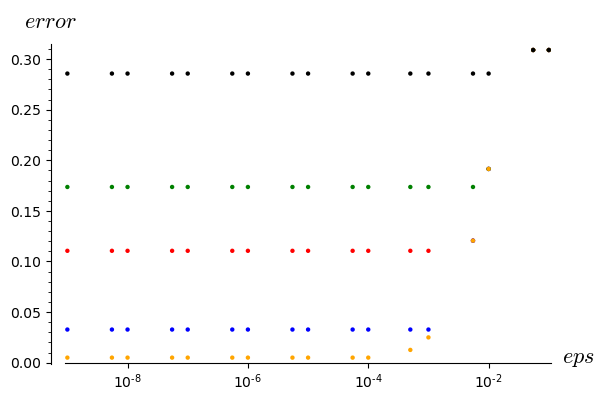

In [51]:
G=plot_error_3d_wrt_eps(Z[1][0], deg=20)
H=plot_error_3d_wrt_eps(Z[1][0], deg=50, color="blue")
K=plot_error_3d_wrt_eps(Z[1][0], deg=10, color="green")
L=plot_error_3d_wrt_eps(Z[1][0], deg=100, color="orange")
M=plot_error_3d_wrt_eps(Z[1][0], deg=1, color="black")
G+H+K+L+M

Interpretation: Again we see that for the various degrees, when the critical eps is met, the error becomes constant

Solid angle measure is: 0.3405023579158556
(0, 0.30900531849841995)
(10, 0.17364102946855753)
(20, 0.11055947918703307)
(30, 0.07264636280100217)
(40, 0.048517546994231275)
(50, 0.032744067859741655)
(60, 0.022266107796182155)
(70, 0.015229403175257339)
(80, 0.010465411612782083)
(90, 0.007219679329870554)
(100, 0.004997008879429388)
(110, 0.0034684381139206133)
(120, 0.0024134093354102326)
(130, 0.0016829539791785586)
(140, 0.0011758469096996849)
(150, 0.0008229562259005063)
(160, 0.0005768643364027493)
(170, 0.00040492639242151185)
(180, 0.00028459497045207893)
(190, 0.0002002524065090605)
(200, 0.00014105368572331356)
(210, 9.945102687369811e-05)
(220, 7.018084848220418e-05)
(230, 4.9565855615996135e-05)
(240, 3.5032782600197265e-05)
(250, 2.4778264351321688e-05)
(260, 1.7536784902183467e-05)
(270, 1.2419172586874971e-05)
(280, 8.799977330997688e-06)
(290, 6.238797549407149e-06)
(300, 4.425235295368868e-06)
(310, 3.1403274819985505e-06)
(320, 2.8335071196039507e-06)
(330, 2.83350711

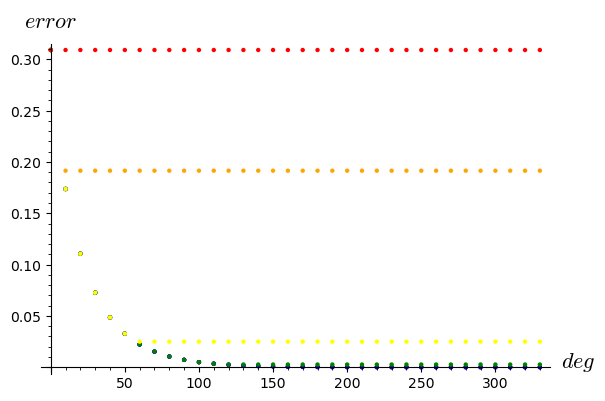

In [53]:
N=plot_error_3d_wrt_deg(Z[1][0], 0, 33, eps=1e-7, color="black") 
K=plot_error_3d_wrt_deg(Z[1][0], 0, 33, eps=1e-6, color="purple")
P=plot_error_3d_wrt_deg(Z[1][0], 0, 33, eps=1e-5, color="blue")
M=plot_error_3d_wrt_deg(Z[1][0], 0, 33, eps=1e-4, color="green") 
H=plot_error_3d_wrt_deg(Z[1][0],0, 33, eps=1e-3, color="yellow")
O=plot_error_3d_wrt_deg(Z[1][0], 0, 33, eps=1e-2, color="orange") 
G=plot_error_3d_wrt_deg(Z[1][0], s=0, t=33, eps=1e-1)
N+K+P+M+H+O+G

Above, we see that when the critical degree is met, the error becomes constant.

Solid angle measure is: 0.3405023579158556
19 (0.00550000000000000, 0.12060036018220377)
57 (0.00100000000000000, 0.024980307181661943)
74 (0.000550000000000000, 0.014123668156709679)
117 (0.000100000000000000, 0.0026901552608099566)
134 (0.0000550000000000000, 0.0014577684724815243)
181 (0.0000100000000000000, 0.000274751807560758)
197 (5.50000000000000e-6, 0.00015667398386659537)
247 (1.00000000000000e-6, 2.748915435368815e-05)
264 (5.50000000000000e-7, 1.527483162633292e-05)
313 (1.00000000000000e-7, 2.8335071196039507e-06)


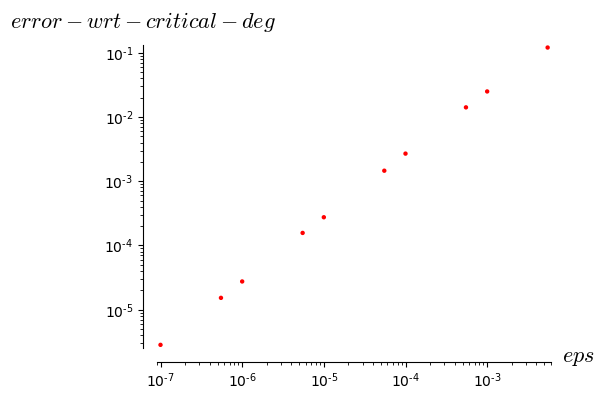

In [54]:
T=[(5.5e-3,19), (1e-3,57), (5.5e-4, 74), (1e-4,117), (5.5e-5,134), (1e-5,181), (5.5e-6, 197), (1e-6,247), (5.5e-7, 264), (1e-7, 313)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(Z[1][0], T, color="red")

Again, we see the same type of relation when the error is plotted with respect to epsilon and the critical degree.

In [84]:
T=[(5.5e-3,19), (1e-3,57), (5.5e-4, 74), (1e-4,117), (5.5e-5,134), (1e-5,181), (5.5e-6, 197), (1e-6,247), (5.5e-7, 264), (1e-7, 313)]
plot_error_ratio(Z[1][0], T)

Solid angle measure is: 0.3405023579158556


[(0.00550000000000000, 21.92733821494614),
 (0.00100000000000000, 24.980307181661942),
 (0.000550000000000000, 25.679396648563053),
 (0.000100000000000000, 26.901552608099564),
 (0.0000550000000000000, 26.504881317845896),
 (0.0000100000000000000, 27.475180756075797),
 (5.50000000000000e-6, 28.48617888483552),
 (1.00000000000000e-6, 27.48915435368815),
 (5.50000000000000e-7, 27.772421138787124),
 (1.00000000000000e-7, 28.335071196039507)]

Here we see again that the ratio of the error (when taken at a critical degree) to epsilon is constant, and suggests that for this cone, the error is given by approximately 27*eps

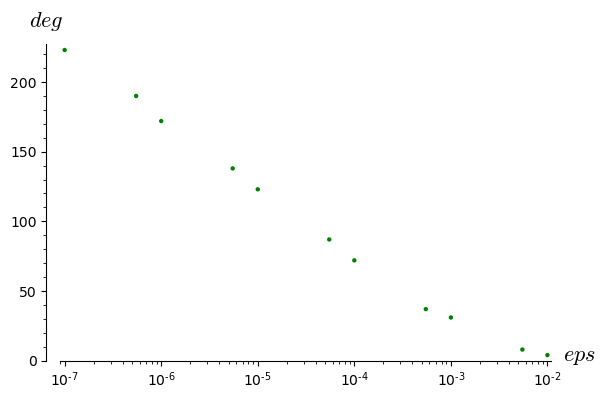

In [99]:
#Z[0][0] log scale
T=[(10^-2, 4), (5.5e-3,8), (10^-3,31), (0.00055, 37), (10^-4,72), (5.5e-5,87), (10^-5,123), (5.5e-6, 138), (10^-6,172), (5.5e-7, 190), (10^-7, 223)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green")

Solid angle measure is: 0.1770767061012525
(1/10, 0.14493017485915005)
(0.0550000000000000, 0.14493017485915005)
(1/100, 0.09431571072836756)
(0.00550000000000000, 0.06888698690880107)
(1/1000, 0.03205462722071395)
(0.000500000000000000, 0.03205462722071395)
(1/10000, 0.03205462722071395)
(0.0000550000000000000, 0.03205462722071395)
(1/100000, 0.03205462722071395)
(5.50000000000000e-6, 0.03205462722071395)
(1/1000000, 0.03205462722071395)
(5.50000000000000e-7, 0.03205462722071395)
(1/10000000, 0.03205462722071395)
(5.50000000000000e-8, 0.03205462722071395)
(1/100000000, 0.03205462722071395)
(5.50000000000000e-9, 0.03205462722071395)
(1/1000000000, 0.03205462722071395)
Solid angle measure is: 0.1770767061012525
(1/10, 0.14493017485915005)
(0.0550000000000000, 0.14493017485915005)
(1/100, 0.09431571072836756)
(0.00550000000000000, 0.06888698690880107)
(1/1000, 0.01742051974887901)
(0.000500000000000000, 0.009374663753585422)
(1/10000, 0.0066221884147039944)
(0.0000550000000000000, 0.0066

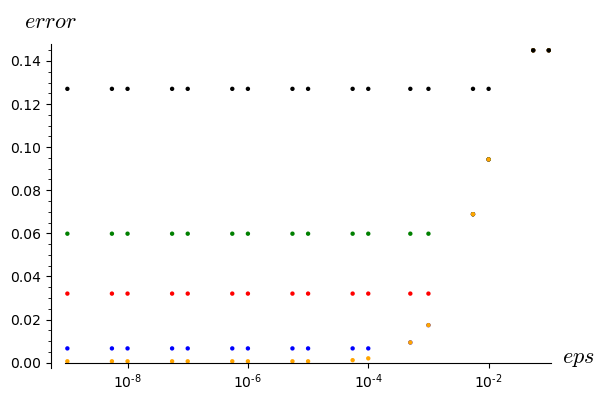

In [56]:
G=plot_error_3d_wrt_eps(Z[0][0], deg=20)
H=plot_error_3d_wrt_eps(Z[0][0], deg=50, color="blue")
K=plot_error_3d_wrt_eps(Z[0][0], deg=10, color="green")
L=plot_error_3d_wrt_eps(Z[0][0], deg=100, color="orange")
M=plot_error_3d_wrt_eps(Z[0][0], deg=1, color="black")
G+H+K+L+M

Solid angle measure is: 0.1770767061012525
(0, 0.14493017485915005)
(10, 0.05985016437362771)
(20, 0.03205462722071395)
(30, 0.018376328342927628)
(40, 0.010910611585362912)
(50, 0.0066221884147039944)
(60, 0.004081439167953782)
(70, 0.00254431747613032)
(80, 0.0016001821631905777)
(90, 0.0010135551892071215)
(100, 0.0006457399940976993)
(110, 0.0004134200176742764)
(120, 0.00026578764356946505)
(130, 0.0001714906803192695)
(140, 0.00011099683381898817)
(150, 7.204161493798433e-05)
(160, 4.687329236485738e-05)
(170, 3.056502656748061e-05)
(180, 1.9970397532181883e-05)
(190, 1.3071648228696331e-05)
(200, 8.570101890592596e-06)
Solid angle measure is: 0.1770767061012525
(0, 0.14493017485915005)
(10, 0.05985016437362771)
(20, 0.03205462722071395)
(30, 0.018376328342927628)
(40, 0.010910611585362912)
(50, 0.0066221884147039944)
(60, 0.004081439167953782)
(70, 0.00254431747613032)
(80, 0.0016001821631905777)
(90, 0.0010135551892071215)
(100, 0.0006457399940976993)
(110, 0.000413420017674276

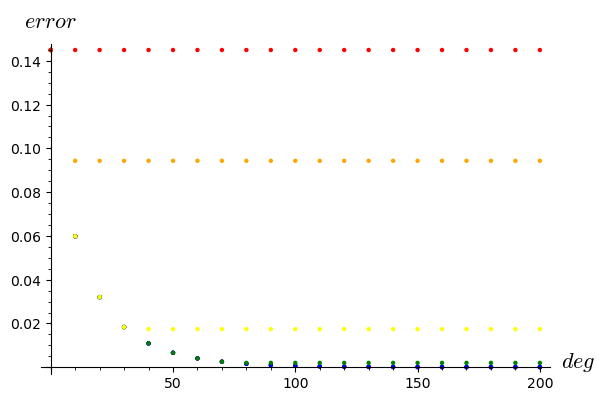

In [57]:
N=plot_error_3d_wrt_deg(Z[0][0], 0, 20, eps=1e-7, color="black")
K=plot_error_3d_wrt_deg(Z[0][0], 0, 20, eps=1e-6, color="purple")
P=plot_error_3d_wrt_deg(Z[0][0], 0, 20, eps=1e-5, color="blue")
M=plot_error_3d_wrt_deg(Z[0][0], 0, 20, eps=1e-4, color="green") 
H=plot_error_3d_wrt_deg(Z[0][0],0, 20, eps=1e-3, color="yellow") 
O=plot_error_3d_wrt_deg(Z[0][0], 0, 20, eps=1e-2, color="orange") 
G=plot_error_3d_wrt_deg(Z[0][0], s=0, t=20, eps=1e-1)
N+K+P+M+H+O+G

Interpretation: Above, we see that the epsilon curves become constant when the critical degree is reached.

Solid angle measure is: 0.1770767061012525
4 (0.0100000000000000, 0.09431571072836756)
8 (0.00550000000000000, 0.06888698690880107)
31 (0.00100000000000000, 0.01742051974887901)
37 (0.000550000000000000, 0.012722917144144502)
72 (0.000100000000000000, 0.002317458328115085)
87 (0.0000550000000000000, 0.001161599426786064)
123 (0.0000100000000000000, 0.00023296586025745025)
138 (5.50000000000000e-6, 0.00012105859622937865)
172 (1.00000000000000e-6, 2.806667229526827e-05)
190 (5.50000000000000e-7, 1.3071648228696331e-05)
223 (1.00000000000000e-7, 3.2634726792879487e-06)


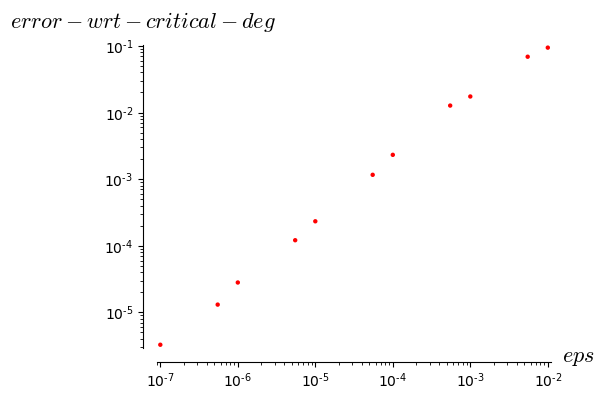

In [58]:
T=[(1e-2, 4), (5.5e-3,8), (1e-3,31), (5.5e-4, 37), (1e-4,72), (5.5e-5,87), (1e-5,123), (5.5e-6, 138), (1e-6,172), (5.5e-7, 190), (1e-7, 223)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(Z[0][0], T, color="red")

Interpretation: Above we see that we get a linear relation when the scale is loglog. 

In [83]:
T=[(1e-2, 4), (5.5e-3,8), (1e-3,31), (5.5e-4, 37), (1e-4,72), (5.5e-5,87), (1e-5,123), (5.5e-6, 138), (1e-6,172), (5.5e-7, 190), (1e-7, 223)]
plot_error_ratio(Z[0][0], T)

Solid angle measure is: 0.1770767061012525


[(0.0100000000000000, 9.431571072836755),
 (0.00550000000000000, 12.524906710691106),
 (0.00100000000000000, 17.42051974887901),
 (0.000550000000000000, 23.132576625717274),
 (0.000100000000000000, 23.17458328115085),
 (0.0000550000000000000, 21.119989577928436),
 (0.0000100000000000000, 23.29658602574502),
 (5.50000000000000e-6, 22.01065385988703),
 (1.00000000000000e-6, 28.06667229526827),
 (5.50000000000000e-7, 23.76663314308424),
 (1.00000000000000e-7, 32.63472679287949)]

Above, we see that the ratio of the error is generally 23, suggesting that a good approximation of the error is 23*eps

In [60]:
B=matrix([[0,1,-2],[1,0,17],[39/34, -1, -1/2]])

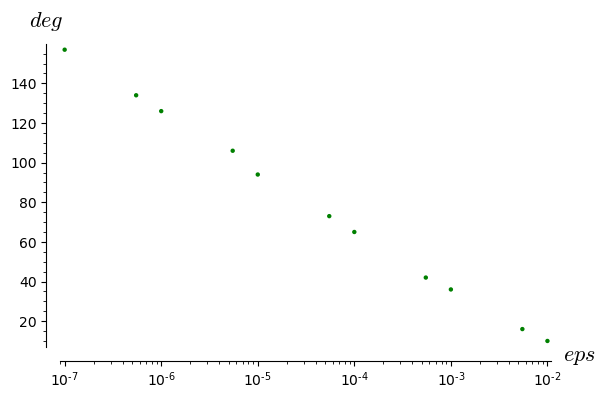

In [100]:
#B log scale
T=[(1e-2, 10), (5.5e-3,16), (10^-3,36), (0.00055, 42), (10^-4,65), (5.5e-5,73), (10^-5,94), (5.5e-6, 106), (10^-6,126), (5.5e-7, 134), (10^-7, 157)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green")

Solid angle measure is: 0.3173484614153835
(1/10, 0.27226242718659377)
(0.0550000000000000, 0.27226242718659377)
(1/100, 0.09733270598067836)
(0.00550000000000000, 0.05774637299198648)
(1/1000, 0.04126845720307437)
(0.000500000000000000, 0.04126845720307437)
(1/10000, 0.04126845720307437)
(0.0000550000000000000, 0.04126845720307437)
(1/100000, 0.04126845720307437)
(5.50000000000000e-6, 0.04126845720307437)
(1/1000000, 0.04126845720307437)
(5.50000000000000e-7, 0.04126845720307437)
(1/10000000, 0.04126845720307437)
(5.50000000000000e-8, 0.04126845720307437)
(1/100000000, 0.04126845720307437)
(5.50000000000000e-9, 0.04126845720307437)
(1/1000000000, 0.04126845720307437)
Solid angle measure is: 0.3173484614153835
(1/10, 0.27226242718659377)
(0.0550000000000000, 0.27226242718659377)
(1/100, 0.09733270598067836)
(0.00550000000000000, 0.05774637299198648)
(1/1000, 0.011326662596282344)
(0.000500000000000000, 0.006046577327521285)
(1/10000, 0.0037970599965786445)
(0.0000550000000000000, 0.003

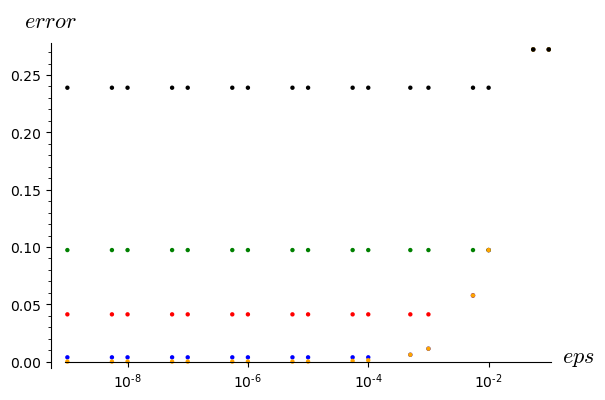

In [61]:
G=plot_error_3d_wrt_eps(B, deg=20)
H=plot_error_3d_wrt_eps(B, deg=50, color="blue")
K=plot_error_3d_wrt_eps(B, deg=10, color="green")
L=plot_error_3d_wrt_eps(B, deg=100, color="orange")
M=plot_error_3d_wrt_eps(B, deg=1, color="black")
G+H+K+L+M

Solid angle measure is: 0.3173484614153835
(0, 0.27226242718659377)
(10, 0.09733270598067836)
(20, 0.04126845720307437)
(30, 0.018262742411796873)
(40, 0.00826609927343186)
(50, 0.0037970599965786445)
(60, 0.001762997506636499)
(70, 0.00082534917935978)
(80, 0.0003889357291146367)
(90, 0.0001842671949893182)
(100, 8.76909948245852e-05)
(110, 4.1888516425836464e-05)
(120, 2.0073739820491987e-05)
(130, 9.646342343738734e-06)
(140, 4.64666955801718e-06)
(150, 2.243040177929423e-06)
(160, 1.2542394773884524e-06)
(170, 1.2542394773884524e-06)
(180, 1.2542394773884524e-06)
(190, 1.2542394773884524e-06)
(200, 1.2542394773884524e-06)
Solid angle measure is: 0.3173484614153835
(0, 0.27226242718659377)
(10, 0.09733270598067836)
(20, 0.04126845720307437)
(30, 0.018262742411796873)
(40, 0.00826609927343186)
(50, 0.0037970599965786445)
(60, 0.001762997506636499)
(70, 0.00082534917935978)
(80, 0.0003889357291146367)
(90, 0.0001842671949893182)
(100, 8.76909948245852e-05)
(110, 4.1888516425836464e-05

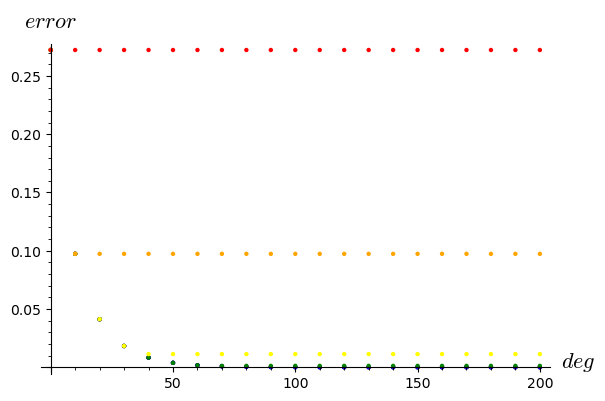

In [63]:
N=plot_error_3d_wrt_deg(B, 0, 20, eps=1e-7, color="black")
K=plot_error_3d_wrt_deg(B, 0, 20, eps=1e-6, color="purple")
P=plot_error_3d_wrt_deg(B, 0, 20, eps=1e-5, color="blue")
M=plot_error_3d_wrt_deg(B, 0, 20, eps=1e-4, color="green") 
H=plot_error_3d_wrt_deg(B,0, 20, eps=1e-3, color="yellow") 
O=plot_error_3d_wrt_deg(B, 0, 20, eps=1e-2, color="orange") 
G=plot_error_3d_wrt_deg(B, s=0, t=20, eps=1e-1)
N+K+P+M+H+O+G

Solid angle measure is: 0.3173484614153835
10 (0.0100000000000000, 0.09733270598067836)
16 (0.00550000000000000, 0.05774637299198648)
36 (1/1000, 0.011326662596282344)
42 (0.000550000000000000, 0.007067851548840487)
65 (1/10000, 0.001205170329960814)
73 (0.0000550000000000000, 0.0006581684103083019)
94 (1/100000, 0.0001368475699514704)
106 (5.50000000000000e-6, 7.023239780651336e-05)
126 (1/1000000, 1.2928123523714419e-05)
134 (5.50000000000000e-7, 7.2004012580118015e-06)
157 (1/10000000, 1.3486861151212892e-06)


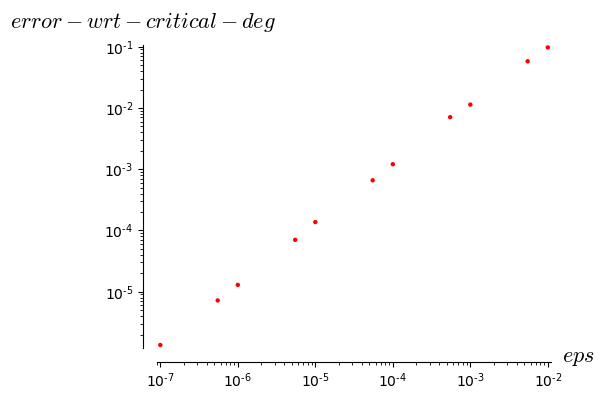

In [64]:
T=[(1e-2, 10), (5.5e-3,16), (10^-3,36), (0.00055, 42), (10^-4,65), (5.5e-5,73), (10^-5,94), (5.5e-6, 106), (10^-6,126), (5.5e-7, 134), (10^-7, 157)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(B, T, color="red")

In [82]:
T=[(1e-2, 10), (5.5e-3,16), (1e-3,36), (5.5e-4, 42), (1e-4,65), (5.5e-5,73), (1e-5,94), (5.5e-6, 106), (1e-6,126), (5.5e-7, 134), (1e-7, 157)]
plot_error_ratio(B, T)

Solid angle measure is: 0.3173484614153835


[(0.0100000000000000, 9.733270598067836),
 (0.00550000000000000, 10.499340543997542),
 (0.00100000000000000, 11.326662596282343),
 (0.000550000000000000, 12.850639179709976),
 (0.000100000000000000, 12.05170329960814),
 (0.0000550000000000000, 11.966698369241852),
 (0.0000100000000000000, 13.684756995147039),
 (5.50000000000000e-6, 12.76952687391152),
 (1.00000000000000e-6, 12.928123523714419),
 (5.50000000000000e-7, 13.091638650930548),
 (1.00000000000000e-7, 13.486861151212892)]

Interpretation: The above relation indicates that for this cone, a good estimation for the error is 12*eps

In [87]:
F=matrix([[6,1,0],[0,1,-2],[1,1,1]])

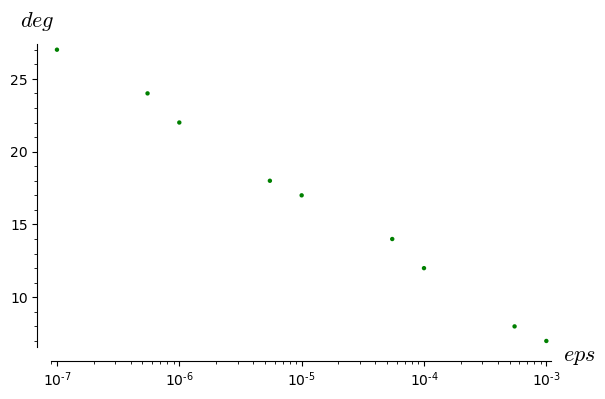

In [101]:
#F log scale
T=[(1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,14), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 24), (1e-7, 27)]
list_plot_semilogx(T, axes_labels=['$eps$', '$deg$'], color="green")

Solid angle measure is: 0.0684833121625528
(1/10, 0.016411959833049022)
(0.0550000000000000, 0.00951570323462507)
(1/100, 0.002638294975950556)
(0.00550000000000000, 0.0014974187477617001)
(1/1000, 0.00031843176449347643)
(0.000500000000000000, 0.0001196059360075441)
(1/10000, 2.8850681799127975e-05)
(0.0000550000000000000, 1.811878809372669e-05)
(1/100000, 2.9062953777331257e-06)
(5.50000000000000e-6, 1.8504385214529462e-06)
(1/1000000, 7.544112910345957e-07)
(5.50000000000000e-7, 7.544112910345957e-07)
(1/10000000, 7.544112910345957e-07)
(5.50000000000000e-8, 7.544112910345957e-07)
(1/100000000, 7.544112910345957e-07)
(5.50000000000000e-9, 7.544112910345957e-07)
(1/1000000000, 7.544112910345957e-07)
Solid angle measure is: 0.0684833121625528
(1/10, 0.016411959833049022)
(0.0550000000000000, 0.00951570323462507)
(1/100, 0.002638294975950556)
(0.00550000000000000, 0.0014974187477617001)
(1/1000, 0.00031843176449347643)
(0.000500000000000000, 0.0001196059360075441)
(1/10000, 2.885068179

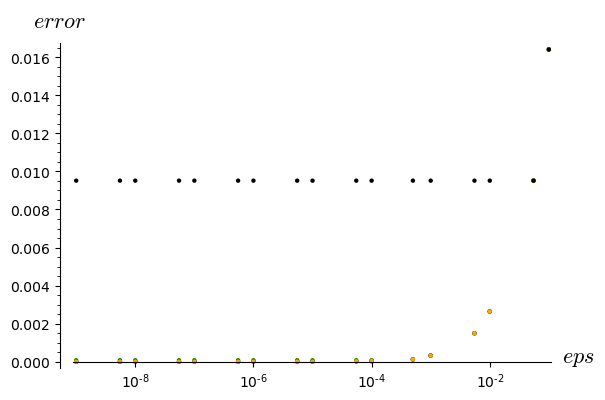

In [88]:
G=plot_error_3d_wrt_eps(F, deg=20)
H=plot_error_3d_wrt_eps(F, deg=50, color="blue")
K=plot_error_3d_wrt_eps(F, deg=10, color="green")
L=plot_error_3d_wrt_eps(F, deg=100, color="orange")
M=plot_error_3d_wrt_eps(F, deg=1, color="black")
G+H+K+L+M

Solid angle measure is: 0.0684833121625528
(0, 0.016411959833049022)
(10, 7.407049939341104e-05)
(20, 7.544112910345957e-07)
(30, 3.414326014972158e-08)
(40, 3.414326014972158e-08)
(50, 3.414326014972158e-08)
(60, 3.414326014972158e-08)
(70, 3.414326014972158e-08)
(80, 3.414326014972158e-08)
(90, 3.414326014972158e-08)
(100, 3.414326014972158e-08)
(110, 3.414326014972158e-08)
(120, 3.414326014972158e-08)
(130, 3.414326014972158e-08)
(140, 3.414326014972158e-08)
(150, 3.414326014972158e-08)
(160, 3.414326014972158e-08)
(170, 3.414326014972158e-08)
(180, 3.414326014972158e-08)
(190, 3.414326014972158e-08)
(200, 3.414326014972158e-08)
Solid angle measure is: 0.0684833121625528
(0, 0.016411959833049022)
(10, 7.407049939341104e-05)
(20, 7.544112910345957e-07)
(30, 3.0957103329398716e-07)
(40, 3.0957103329398716e-07)
(50, 3.0957103329398716e-07)
(60, 3.0957103329398716e-07)
(70, 3.0957103329398716e-07)
(80, 3.0957103329398716e-07)
(90, 3.0957103329398716e-07)
(100, 3.0957103329398716e-07)
(1

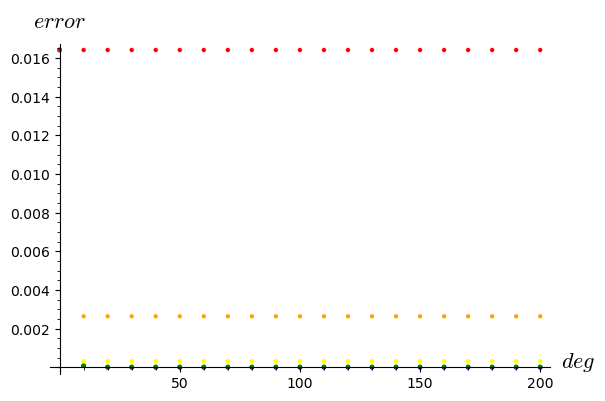

In [89]:
N=plot_error_3d_wrt_deg(F, 0, 20, eps=1e-7, color="black")
K=plot_error_3d_wrt_deg(F, 0, 20, eps=1e-6, color="purple")
P=plot_error_3d_wrt_deg(F, 0, 20, eps=1e-5, color="blue")
M=plot_error_3d_wrt_deg(F, 0, 20, eps=1e-4, color="green") 
H=plot_error_3d_wrt_deg(F,0, 20, eps=1e-3, color="yellow") 
O=plot_error_3d_wrt_deg(F, 0, 20, eps=1e-2, color="orange") 
G=plot_error_3d_wrt_deg(F, s=0, t=20, eps=1e-1)
N+K+P+M+H+O+G

Solid angle measure is: 0.0684833121625528
7 (0.00100000000000000, 0.00031843176449347643)
8 (0.000550000000000000, 0.00019436173271854262)
12 (0.000100000000000000, 2.8850681799127975e-05)
14 (0.0000550000000000000, 1.811878809372669e-05)
17 (0.0000100000000000000, 2.9062953777331257e-06)
18 (5.50000000000000e-6, 1.8504385214529462e-06)
22 (1.00000000000000e-6, 3.0957103329398716e-07)
24 (5.50000000000000e-7, 1.9872430555289977e-07)
27 (1.00000000000000e-7, 3.414326014972158e-08)


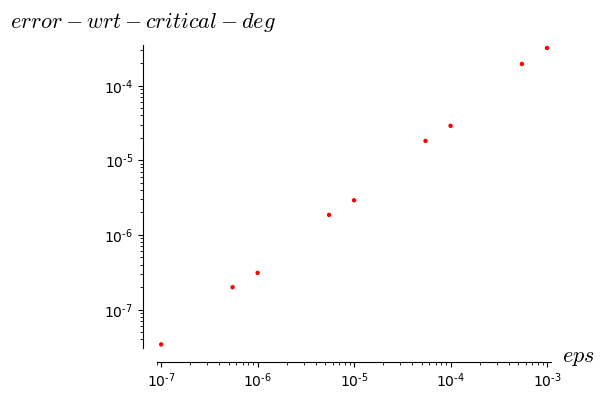

In [95]:
T=[(1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,14), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 24), (1e-7, 27)]
plot_error_3d_wrt_criticaldeg_and_criticaleps(F, T, color="red")

In [91]:
T=[(1e-3,7), (5.5e-4, 8), (1e-4,12), (5.5e-5,14), (1e-5,17), (5.5e-6, 18), (1e-6,22), (5.5e-7, 24), (1e-7, 27)]
plot_error_ratio(F,T)

Solid angle measure is: 0.0684833121625528


[(0.00100000000000000, 0.31843176449347643),
 (0.000550000000000000, 0.3533849685791684),
 (0.000100000000000000, 0.28850681799127975),
 (0.0000550000000000000, 0.3294325107950307),
 (0.0000100000000000000, 0.2906295377733126),
 (5.50000000000000e-6, 0.3364433675368993),
 (1.00000000000000e-6, 0.30957103329398716),
 (5.50000000000000e-7, 0.36131691918709047),
 (1.00000000000000e-7, 0.34143260149721577)]

The above relation suggests that a good approximation for the error for this cone is 0.3*eps.